In [1]:
import numpy as np
import gym
import math
import torch as T
import random
from EnvGym import MyEnv
from sac_agent import SAC_Agent
from MarcoSasha import MarcoSasha
import time
import matplotlib.pyplot as plt

In [2]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 200

dt = 1/ N_prices # time step

In [3]:
env = MyEnv(s0, sigma, dt, N_prices, A, k)

# agent = SAC_Agent([3], env=env, memory_size=30000, alpha= 0.0008, beta= 0.0008, tau = 0.0006, reward_scale=5, batch_size=16)
# agent = SAC_Agent([3], env=env, memory_size=50000, alpha= 0.008, beta= 0.008, tau = 0.0005, reward_scale=5, batch_size=256)
# agent = SAC_Agent([3], env=env, memory_size=5000, alpha= 0.0008, beta= 0.0008, tau = 0.005, reward_scale=5, batch_size=256)
# agent = SAC_Agent([3], env=env, memory_size=1000, alpha= 0.0008, beta= 0.0008, tau = 0.005, reward_scale=5, batch_size=128) # maybe add more layers here

agent = SAC_Agent([3], env=env, memory_size=512, alpha= 0.0008, beta= 0.0008, tau = 0.0005, reward_scale=5, batch_size=256, layer1 = 256, layer2 = 256) 
# agent = SAC_Agent([3], env=env, memory_size=256, alpha= 0.0008, beta= 0.0008, tau = 0.006, reward_scale=5, batch_size=256) # maybe add more layers here


train_start = time.time()
epochs_start = time.time()

epoch_num = 500


train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):

    states_before, actions, rewards, states_next, dones = [], [], [], [], []

    # print("EPOCH: ", epoch)
    
    env.reset()


    # --------------------------------------------- now i have state I am at now
    done = False
    while not done:

        # print("State now: ", env.state_now)

        action = agent.pick_action(env.state_now)
        # print("ACTION: ", action)
        state_now = env.state_now
   
        # --------------------------------------------- now i also have action I would like to take
            
        state_next, reward, done, _, _ = env.step(action)

        # print("State I arrived: ", env.state_now)
        # print("Real state I arrived: ", env.state_now[0]*100, env.state_now[1], env.state_now[2]*100)
        # print("Reward I gained: ", reward)

        # if reward>=0:
        #     reward *=2 
        states_before.append(state_now)       
        actions.append(action)       
        rewards.append(reward)       
        states_next.append(state_next)       
        dones.append(done)       
       
        agent.remember(state_now, action, reward, state_next, done)
    # print("Total reward: ", env.reward_total)
    agent.learn()

    # check if actions are the same always, by checking if std is 0
    print("Std of actions: ", np.std(actions))

    # save cumulative reward for epoch
    train_rewards[epoch] = env.reward_total
    print(env.reward_total)
    # print()


C:\Users\dusan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Std of actions:  0.016412282
-193.38591772255762
Std of actions:  0.01704373
-154.56331486054344
Std of actions:  0.119816616
-2164.0056599080044
Std of actions:  0.0464958
-693.099570732694
Std of actions:  0.03521476
-303.05167183982417
Std of actions:  0.07308797
-955.2535881296379
Std of actions:  0.067248225
-995.1643130290205
Std of actions:  0.042477157
-687.3031693656426
Std of actions:  0.023099558
-195.41541521898645
Std of actions:  0.017334677
-286.2633964787385
Std of actions:  0.027213223
-179.43834051521418
Std of actions:  0.048106976
-230.9676965842766
Std of actions:  0.07432682
-592.0913034408514
Std of actions:  0.08316421
-1063.8880793912497
Std of actions:  0.06766011
-1059.2272017815098
Std of actions:  0.04501404
-1126.9754790650495
Std of actions:  0.043868866
-1424.6499937294798
Std of actions:  0.060398042
-1097.5254887675226
Std of actions:  0.08985008
-1171.1564758002885
Std of actions:  0.12554839
-916.2361890799127
Std of actions:  0.16705832
-299.7076633

In [4]:
train_rewards
epoch
# np.mean(train_rewards)



499

Mean of every 100 elements: [-774.4831132720501, -520.1207140836116, -2171.144056177153, -1011.9895664414398, -651.6457541740753, -527.9070178497748, -723.9934617135511, -641.6496467546388, -385.9201694520927, -447.6086778087777, -784.7624398758225, -925.1531617533319, -335.3515204002256]


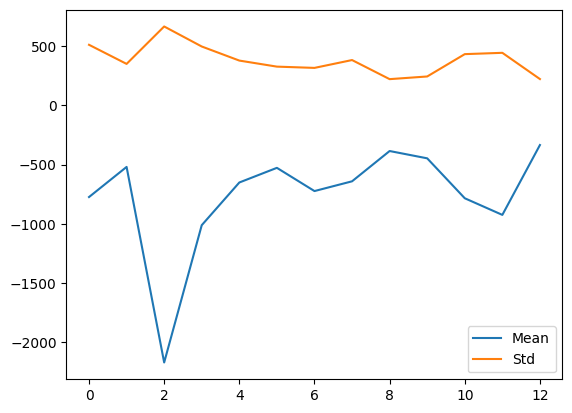

In [5]:
train_rewards = train_rewards[:258]
chunks = [train_rewards[i:i+20] for i in range(0, len(train_rewards), 20)]

# Calculate the mean of each chunk
means = [np.mean(chunk) for chunk in chunks]

# Print the std of each chunk
stds = [np.std(chunk) for chunk in chunks]

print("Mean of every 100 elements:", means)

# plot the mean and std of each chunk
plt.plot(means, label='Mean')
plt.plot(stds, label='Std')
plt.legend()
plt.show()


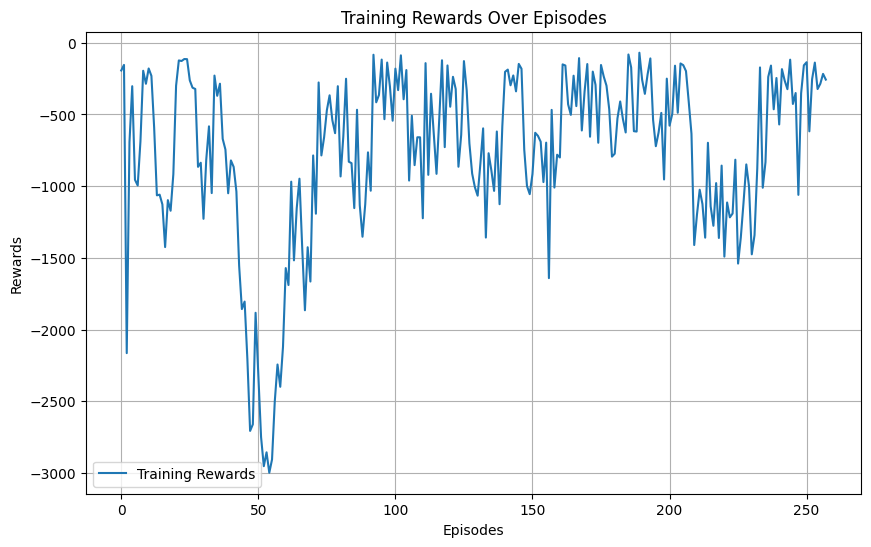

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(train_rewards,  label='Training Rewards', linestyle='-')
plt.title('Training Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.grid(True)
plt.savefig('training_rewards_plot.png')
plt.show()

#### Marco Sasha:

In [7]:
MarcoSasha = MarcoSasha(env.s, sigma, N_prices, T, dt, gamma, k, A)
MarcoSasha.simulate()

# cumulative reward of MarcoSasha.rewards
cumulative_reward = sum(MarcoSasha.rewards)
cumulative_reward

46.59674564475031

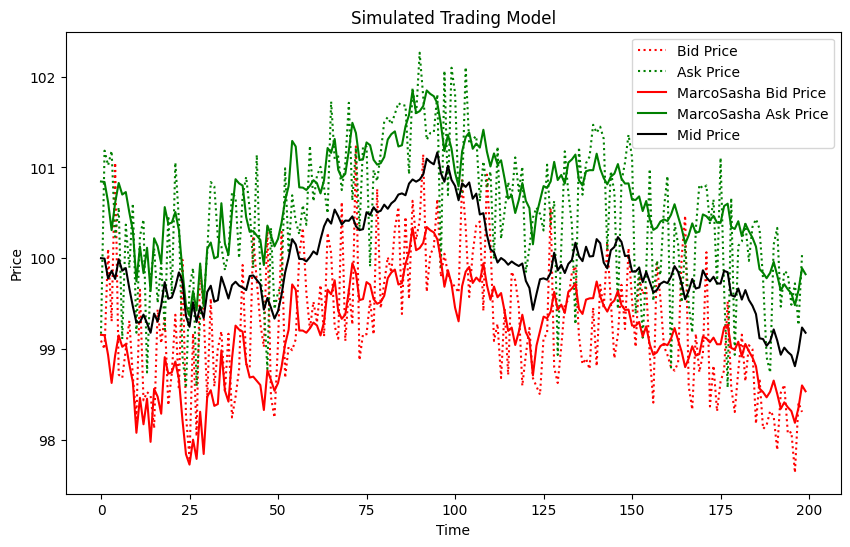

In [12]:
plt.figure(figsize=(10, 6))
# plt.plot(t, res_price_array, label='Res Price')

plt.plot(env.Bid, label='Bid Price', color='red', linestyle='dotted')
plt.plot(env.Ask, label='Ask Price', color='green', linestyle='dotted')

plt.plot(MarcoSasha.Bid_price, label='MarcoSasha Bid Price', color='red', linestyle='-')
plt.plot(MarcoSasha.Ask_price, label='MarcoSasha Ask Price', color='green', linestyle='-')

plt.plot(env.s, label='Mid Price', color='black', linestyle='-')

plt.title('Simulated Trading Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

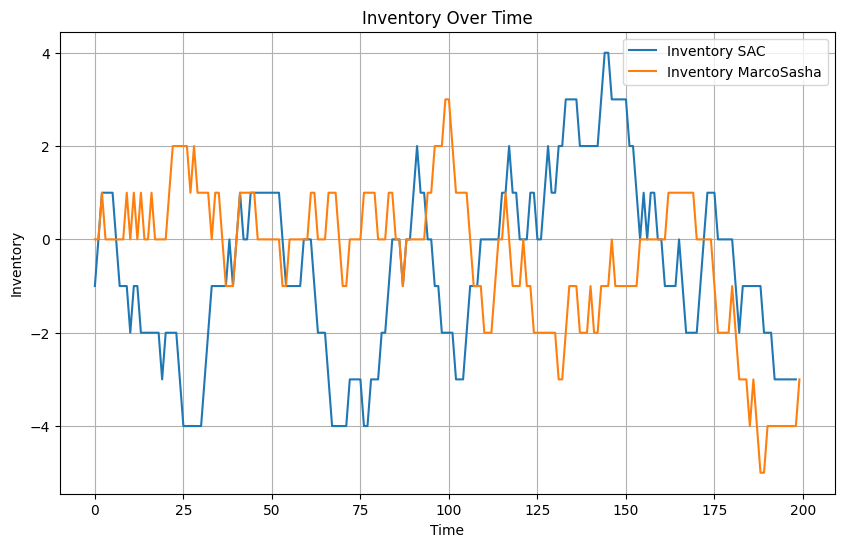

In [9]:
# plot invetory_array
plt.figure(figsize=(10, 6))
plt.plot(env.inventory_array, label='Inventory SAC')
plt.plot(MarcoSasha.q, label='Inventory MarcoSasha')
plt.title('Inventory Over Time')
plt.xlabel('Time')
plt.ylabel('Inventory')
plt.legend()
plt.grid(True)
plt.show()

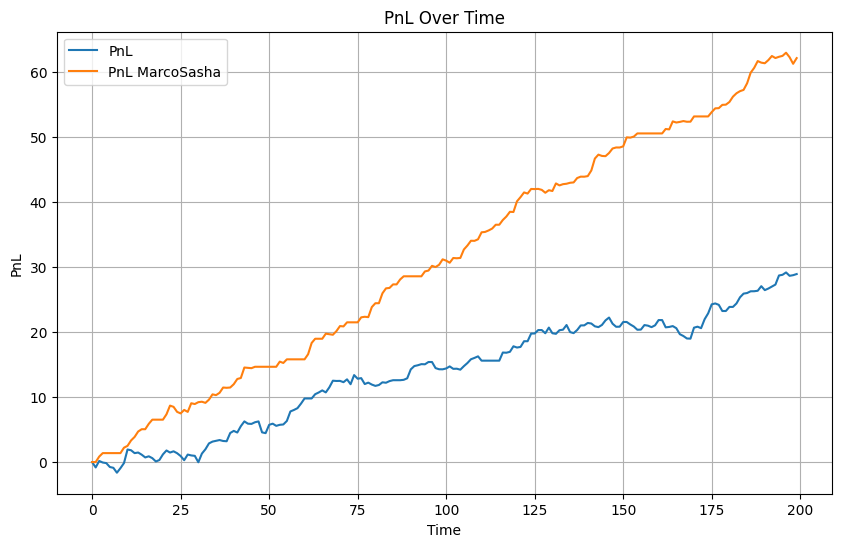

In [10]:
# plot PnL
plt.figure(figsize=(10, 6))
plt.plot(env.PnL_array, label='PnL SAC')
plt.plot(MarcoSasha.PnL_array, label='PnL MarcoSasha')
plt.title('PnL Over Time')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.legend()
plt.grid(True)
plt.show()